In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [ ]:
# The first column in the CSV file should be used as the index
# data = pd.read_csv('house_prices_data_cleaned.csv', index_col=0)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Final Project/house_prices_data_cleaned.csv', index_col=0)

In [8]:
df = data[['number_rooms', 'area_m2', 'bathrooms', 'condominium fees', 'total building floors', 'with_disabled_access', 'with_lift','price_euro']]

## Feature Selection

In [9]:
# Calculate correlation coefficients
correlations = df.corr(method='spearman')  # Spearman's rank correlation for potentially non-linear relationships

# Select features with high correlation to price
selected_features = correlations[abs(correlations['price_euro']) > 0.20].index.tolist()

df = df[selected_features]

In [10]:
# We will use these numerical inputs because they achieve high correlation
df.head()

,number_rooms,area_m2,bathrooms,condominium fees,with_lift,price_euro
0,3,100,1,250.0,1,289000
1,2,78,1,208.0,1,398000
2,3,85,1,180.0,1,420000
3,3,80,1,83.0,1,780000
4,2,50,1,80.0,1,395000


In [11]:
df_model = data[['number_rooms', 'area_m2', 'bathrooms', 'condominium fees', 'with_lift', 'neighborhood', 'price_euro']]

In [12]:
# Check for null values
df_model.isnull().sum()

number_rooms        0
area_m2             0
bathrooms           0
condominium fees    6
with_lift           0
neighborhood        0
price_euro          0
dtype: int64

In [13]:
# Fill missing values with the mean of the 'condominium_fees' column
df_model['condominium fees'] = df_model['condominium fees'].fillna(df_model['condominium fees'].mean())

<ipython-input-13-2444d82b5ec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['condominium fees'] = df_model['condominium fees'].fillna(df_model['condominium fees'].mean())


In [14]:
df_model.isnull().sum()

number_rooms        0
area_m2             0
bathrooms           0
condominium fees    0
with_lift           0
neighborhood        0
price_euro          0
dtype: int64

In [15]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1616 entries, 0 to 1615
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number_rooms      1616 non-null   int64  
 1   area_m2           1616 non-null   int64  
 2   bathrooms         1616 non-null   int64  
 3   condominium fees  1616 non-null   float64
 4   with_lift         1616 non-null   int64  
 5   neighborhood      1616 non-null   object 
 6   price_euro        1616 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 101.0+ KB


### Analyze and visualize the correlations between numerical features in a DataFrame using a heatmap.

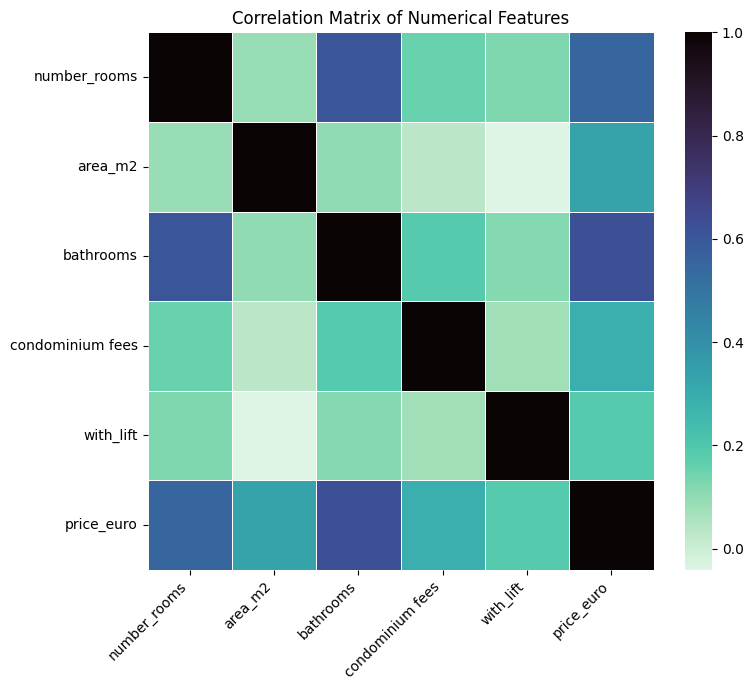

In [16]:
correlation = df_model.select_dtypes('number').corr()
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(correlation, ax=ax, annot=False, linewidths=0.5, cmap='mako_r')

ax.set_title('Correlation Matrix of Numerical Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Outliers handling

In [17]:
# sns.boxplot(x='price_euro', data=df_model)

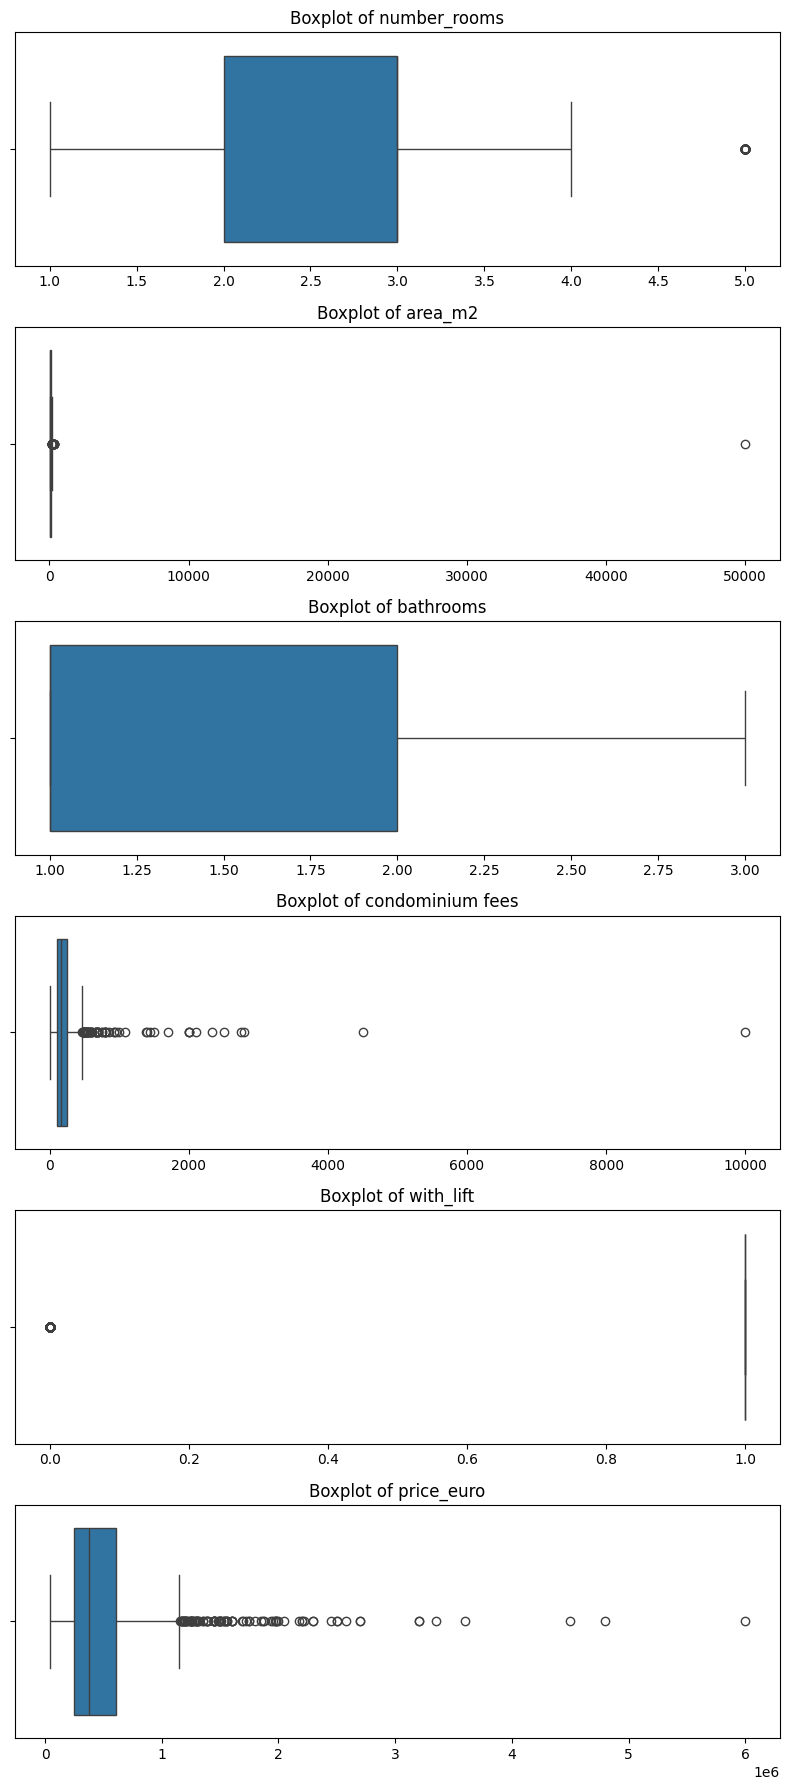

In [18]:
numeric_columns = df_model.select_dtypes('number').columns
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, len(numeric_columns) * 3))

for column, ax in zip(numeric_columns, axes):
    sns.boxplot(data=df_model, x=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [19]:
q1_price = np.percentile(df_model['price_euro'], 25)
q3_price = np.percentile(df_model['price_euro'], 75)
iqr_price = q3_price - q1_price

q1_rooms = np.percentile(df_model['number_rooms'], 25)
q3_rooms = np.percentile(df_model['number_rooms'], 75)
iqr_rooms = q3_rooms - q1_rooms

q1_area = np.percentile(df_model['area_m2'], 25)
q3_area = np.percentile(df_model['area_m2'], 75)
iqr_area = q3_area - q1_area

q1_fees = np.percentile(df_model['condominium fees'], 25)
q3_fees = np.percentile(df_model['condominium fees'], 75)
iqr_fees = q3_fees - q1_fees

mask1 = (df_model['price_euro'] < (q3_price + 1.5 * iqr_price)) & (df_model['price_euro'] > (q1_price - 1.5 * iqr_price))
mask2 = (df_model['number_rooms'] < (q3_rooms + 1.5 * iqr_rooms)) & (df_model['number_rooms'] > (q1_rooms - 1.5 * iqr_rooms))
mask3 = (df_model['area_m2'] < (q3_area + 1.5 * iqr_area)) & (df_model['area_m2'] > (q1_area - 1.5 * iqr_area))
mask4 = (df_model['condominium fees'] < (q3_fees + 1.5 * iqr_fees)) & (df_model['condominium fees'] > (q1_fees - 1.5 * iqr_fees))

df_model = df_model[mask1 & mask2 & mask3 & mask4]

In [20]:
df_model.shape

(1439, 7)

In [21]:
df_model.index = range(df_model.shape[0])

# Split the data to features and target
target = df_model['price_euro'].copy()
df_model.drop('price_euro', axis=1, inplace=True)

### Encode categorical inputs

In [22]:
# One-hot encoding is a technique for converting categorical variables into a set of binary variables.
# Each binary variable represents a category, and it's set to 1 if the data point belongs to that category, and 0 otherwise.
neighborhoods = pd.get_dummies(df_model['neighborhood'], dtype='int')
neighborhoods.head()

,Affori,Amendola - Buonarroti,Arco della Pace,Argonne - Corsica,Ascanio Sforza,Baggio,Bande Nere,Barona,Bicocca,Bignami - Ponale,...,Udine,Vercelli - Wagner,Via Pusiano,Vialba,Viale Ungheria - Mecenate,Vigentino - Fatima,Villa San Giovanni,Vincenzo Monti,Washington,Zara
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_model

,number_rooms,area_m2,bathrooms,condominium fees,with_lift,neighborhood
0,3,100,1,250.0,1,Baggio
1,2,78,1,208.0,1,Argonne - Corsica
2,3,85,1,180.0,1,Crescenzago
3,3,80,1,83.0,1,Porta Romana - Medaglie d'Oro
4,2,50,1,80.0,1,Porta Vittoria
...,...,...,...,...,...,...
1434,2,45,1,100.0,1,Vialba
1435,3,90,2,208.0,1,Giambellino
1436,2,54,1,100.0,1,Vialba
1437,2,50,1,40.0,1,Porta Romana - Medaglie d'Oro


## Data Transform

In [24]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
data = scaler.fit_transform(df_model.drop('neighborhood', axis=1))
data = pd.DataFrame(data, columns=df_model.drop('neighborhood', axis=1).columns)
data

,number_rooms,area_m2,bathrooms,condominium fees,with_lift
0,0.578807,0.659838,-0.537782,0.897343,0.556212
1,-0.702582,-0.072421,-0.537782,0.454594,0.556212
2,0.578807,0.160571,-0.537782,0.159427,0.556212
3,0.578807,-0.005852,-0.537782,-0.863114,0.556212
4,-0.702582,-1.004387,-0.537782,-0.894739,0.556212
...,...,...,...,...,...
1434,-0.702582,-1.170810,-0.537782,-0.683905,0.556212
1435,0.578807,0.326993,1.692387,0.454594,0.556212
1436,-0.702582,-0.871249,-0.537782,-0.683905,0.556212
1437,-0.702582,-1.004387,-0.537782,-1.316405,0.556212


In [25]:
# Concatenate the two dataframes
df_prepared = pd.concat([data, neighborhoods], axis=1)
df_prepared

,number_rooms,area_m2,bathrooms,condominium fees,with_lift,Affori,Amendola - Buonarroti,Arco della Pace,Argonne - Corsica,Ascanio Sforza,...,Udine,Vercelli - Wagner,Via Pusiano,Vialba,Viale Ungheria - Mecenate,Vigentino - Fatima,Villa San Giovanni,Vincenzo Monti,Washington,Zara
0,0.578807,0.659838,-0.537782,0.897343,0.556212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.702582,-0.072421,-0.537782,0.454594,0.556212,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.578807,0.160571,-0.537782,0.159427,0.556212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.578807,-0.005852,-0.537782,-0.863114,0.556212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.702582,-1.004387,-0.537782,-0.894739,0.556212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,-0.702582,-1.170810,-0.537782,-0.683905,0.556212,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1435,0.578807,0.326993,1.692387,0.454594,0.556212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,-0.702582,-0.871249,-0.537782,-0.683905,0.556212,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1437,-0.702582,-1.004387,-0.537782,-1.316405,0.556212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_prepared, target, test_size=0.2, random_state=0)

In [27]:
from sklearn.metrics import mean_absolute_error

def try_model(model, X, y):
    model = model
    model.fit(X, y)
    housing_predictions = model.predict(X)
    model_mae = mean_absolute_error(y, housing_predictions)

    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -scores

    print(f'MAE on training set: {model_mae}\n')
    print(f'MAE on k-fold cv sets:\nScores: {mae_scores}\nMean: {mae_scores.mean():.2f}\nStandard deviation: {mae_scores.std():.2f}')


In [28]:
from sklearn.linear_model import LinearRegression

# Linear regression model
lin_reg = LinearRegression()
try_model(lin_reg, X_train, y_train) # The model suffers from a very bad overfitting

MAE on training set: 64457.933101650735

MAE on k-fold cv sets:
Scores: [3.64249634e+14 6.41141436e+14 1.62750477e+15 5.16333350e+15
 1.43248126e+13]
Mean: 1562110831892047.75
Standard deviation: 1878924092285210.50


In [29]:
from sklearn.svm import SVR

# Support Vector Regressor model
svm_reg = SVR(kernel="linear")
try_model(svm_reg, X_train, y_train) # The model suffers from a very bad underfitting

MAE on training set: 176770.2213178737

MAE on k-fold cv sets:
Scores: [177361.7804159  173335.55845385 187583.19359137 170772.9876669
 175924.71095791]
Mean: 176995.65
Standard deviation: 5753.17


In [30]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)
try_model(tree_reg, X_train, y_train) # The model suffers from a very bad overfitting

MAE on training set: 1327.5664639443962

MAE on k-fold cv sets:
Scores: [104761.2987013  111488.74347826 105294.7        118622.25434783
 108283.70652174]
Mean: 109690.14
Standard deviation: 5071.67


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
forest_reg = RandomForestRegressor(random_state=42)
try_model(forest_reg, X_train, y_train) # The model suffers from a very bad overfitting

MAE on training set: 32813.56524634893

MAE on k-fold cv sets:
Scores: [92461.82733055 95796.96369565 93249.49871532 98777.64217899
 82497.60926139]
Mean: 92556.71
Standard deviation: 5493.15


In [32]:
# GridSearchCV to fine-tune the hyperparameters for a Random Forest model

params_grid = {'n_estimators':range(10,300,10), 'max_features':('auto','sqrt','log2')}

random_forest = RandomForestRegressor()

grid_search = GridSearchCV(random_forest,params_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=3)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 87 candidates, totalling 435 fits
[CV 1/5] END max_features=auto, n_estimators=10;, score=(train=-2984052715.885, test=-18829303084.385) total time=   0.1s
[CV 2/5] END max_features=auto, n_estimators=10;, score=(train=-2708992720.012, test=-18553138367.774) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV 3/5] END max_features=auto, n_estimators=10;, score=(train=-2775683723.672, test=-18624090295.203) total time=   0.1s
[CV 4/5] END max_features=auto, n_estimators=10;, score=(train=-3049743665.237, test=-19388415869.639) total time=   0.1s
[CV 5/5] END max_features=auto, n_estimators=10;, score=(train=-3531261878.496, test=-13373232232.678) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV 1/5] END max_features=auto, n_estimators=20;, score=(train=-2616009746.828, test=-17625025418.315) total time=   0.2s
[CV 2/5] END max_features=auto, n_estimators=20;, score=(train=-2858771516.724, test=-18006160216.946) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=20;, score=(train=-2383213187.983, test=-19089027765.464) total time=   0.2s
[CV 4/5] END max_features=auto, n_estimators=20;, score=(train=-2656319128.786, test=-18506470458.901) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=20;, score=(train=-2749287136.779, test=-13474150617.532) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=30;, score=(train=-2484345745.651, test=-18013563334.081) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=30;, score=(train=-2613540818.358, test=-18304235057.620) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=30;, score=(train=-2366562003.608, test=-18223405161.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=30;, score=(train=-2339145722.000, test=-19801753940.629) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=30;, score=(train=-2673091450.566, test=-14218085586.443) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=40;, score=(train=-2298287435.868, test=-17810570204.780) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=40;, score=(train=-2454278972.848, test=-18623428529.007) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=40;, score=(train=-2372991729.400, test=-18875564354.096) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=40;, score=(train=-2283449292.057, test=-19168661210.327) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=40;, score=(train=-2677669086.383, test=-13688813985.621) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=50;, score=(train=-2423909794.978, test=-18206160606.343) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=50;, score=(train=-2444845979.296, test=-17502622905.900) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=50;, score=(train=-2213020772.262, test=-18866474507.232) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=50;, score=(train=-2189757542.945, test=-18902352997.648) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=50;, score=(train=-2406795663.076, test=-12734735708.978) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=60;, score=(train=-2404180202.392, test=-18330491086.758) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=60;, score=(train=-2445906548.903, test=-17891208858.796) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=60;, score=(train=-2391249938.345, test=-18384251327.424) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=60;, score=(train=-2323502070.909, test=-18695208170.249) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=60;, score=(train=-2538806809.272, test=-13043550042.058) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=70;, score=(train=-2363898574.132, test=-17668665701.188) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=70;, score=(train=-2376885100.499, test=-18071489256.610) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=70;, score=(train=-2264208630.614, test=-18342875809.367) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=70;, score=(train=-2248808585.037, test=-18801637670.824) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=70;, score=(train=-2553123153.636, test=-14056314848.636) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=80;, score=(train=-2288536537.798, test=-17683792146.473) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=80;, score=(train=-2251565981.941, test=-18054727116.221) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=80;, score=(train=-2298340670.473, test=-18586671814.503) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=80;, score=(train=-2160179033.075, test=-18632718916.558) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=80;, score=(train=-2418195844.488, test=-12899228186.488) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=90;, score=(train=-2330747908.255, test=-17340709406.287) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=90;, score=(train=-2325374218.302, test=-17728090462.117) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=90;, score=(train=-2291503929.393, test=-18583481472.947) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=90;, score=(train=-2191268944.392, test=-18476781706.065) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=90;, score=(train=-2393344812.537, test=-13284147516.684) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=100;, score=(train=-2255856634.849, test=-17381512915.318) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=100;, score=(train=-2328403288.139, test=-18298980869.170) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=100;, score=(train=-2175833634.595, test=-18174464967.273) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=100;, score=(train=-2185277855.261, test=-18596508906.268) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=100;, score=(train=-2450840867.160, test=-13112296438.089) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=110;, score=(train=-2281611872.599, test=-17665454912.985) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=110;, score=(train=-2305102600.809, test=-17715368764.914) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=110;, score=(train=-2291657522.592, test=-18016448966.922) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=110;, score=(train=-2147905102.776, test=-18573053782.502) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=110;, score=(train=-2379768763.373, test=-13226017366.705) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=120;, score=(train=-2229340175.428, test=-17045436405.679) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=120;, score=(train=-2286832548.055, test=-17396921702.557) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=120;, score=(train=-2268893790.499, test=-18263973091.188) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=120;, score=(train=-2075672117.166, test=-18892215683.593) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=120;, score=(train=-2503629835.330, test=-13223722437.565) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=130;, score=(train=-2221875140.069, test=-17991492740.673) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=130;, score=(train=-2324387689.404, test=-17818692075.081) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=130;, score=(train=-2208219232.584, test=-18169183060.200) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=130;, score=(train=-2207784670.094, test=-18173403541.051) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=130;, score=(train=-2504306788.173, test=-12966435299.030) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=140;, score=(train=-2192809705.409, test=-17220795949.534) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=140;, score=(train=-2345354424.651, test=-17914188182.887) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=140;, score=(train=-2304874349.178, test=-18440165857.052) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=140;, score=(train=-2166264367.757, test=-18449359065.259) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=140;, score=(train=-2487750595.863, test=-12881012055.208) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=150;, score=(train=-2274552798.723, test=-17755577817.494) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=150;, score=(train=-2337311505.470, test=-18020992839.828) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=150;, score=(train=-2210063725.445, test=-18371561081.123) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=150;, score=(train=-2146088185.515, test=-18365273951.126) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=150;, score=(train=-2464612147.137, test=-12902814658.315) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=160;, score=(train=-2291476606.018, test=-17738201449.781) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=160;, score=(train=-2337206445.882, test=-17858753280.541) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=160;, score=(train=-2259076967.231, test=-18340643025.475) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=160;, score=(train=-2162686069.693, test=-18649120351.491) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=160;, score=(train=-2388510583.230, test=-12552644066.343) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=170;, score=(train=-2258675111.819, test=-17613342101.890) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=170;, score=(train=-2316777420.971, test=-17715366683.680) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=170;, score=(train=-2224945872.830, test=-18407374333.471) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=170;, score=(train=-2124925073.283, test=-18255729296.578) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=170;, score=(train=-2451045150.546, test=-13060142783.180) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=180;, score=(train=-2208895845.865, test=-17454112200.430) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=180;, score=(train=-2264843482.509, test=-17752625893.812) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=180;, score=(train=-2200816730.024, test=-18492925142.610) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=180;, score=(train=-2165958499.466, test=-18194063277.911) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=180;, score=(train=-2459964301.101, test=-13082083411.779) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=190;, score=(train=-2197821794.679, test=-17480755364.213) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=190;, score=(train=-2256974109.842, test=-18032046275.374) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=190;, score=(train=-2137081817.370, test=-18373577025.186) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=190;, score=(train=-2124412459.732, test=-18396854177.259) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=190;, score=(train=-2479857418.403, test=-12463819006.145) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=200;, score=(train=-2153803596.777, test=-17854657480.433) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=200;, score=(train=-2236514663.772, test=-17839241552.664) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=200;, score=(train=-2228421887.569, test=-18276500133.689) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=200;, score=(train=-2143741828.762, test=-18512343546.383) total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=200;, score=(train=-2462085494.796, test=-12838387624.711) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=210;, score=(train=-2229118840.562, test=-17872195152.009) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=210;, score=(train=-2353211714.272, test=-17832572878.057) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=210;, score=(train=-2242335780.636, test=-18297831884.246) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=210;, score=(train=-2097401245.295, test=-18386803861.985) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=210;, score=(train=-2405478483.863, test=-13362968297.896) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=220;, score=(train=-2260218026.442, test=-17445554473.430) total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=220;, score=(train=-2266117646.981, test=-18101200472.959) total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=220;, score=(train=-2183946217.578, test=-18177793174.366) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=220;, score=(train=-2091169973.115, test=-18533364205.875) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=220;, score=(train=-2465898939.183, test=-13108160238.016) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=230;, score=(train=-2230338559.568, test=-17457493820.550) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=230;, score=(train=-2225601530.765, test=-17729261367.634) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=230;, score=(train=-2234246338.482, test=-18055032194.788) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=230;, score=(train=-2148785955.218, test=-18535029196.592) total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=230;, score=(train=-2367595156.392, test=-12771581771.670) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=240;, score=(train=-2227450142.650, test=-17429725877.239) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=240;, score=(train=-2325926822.485, test=-17840923070.249) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=240;, score=(train=-2168284503.476, test=-17903978078.218) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=240;, score=(train=-2191202884.974, test=-18407422905.957) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=240;, score=(train=-2389483119.496, test=-12584681583.436) total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=250;, score=(train=-2212016751.992, test=-17442464770.599) total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=250;, score=(train=-2235091391.236, test=-17743923900.619) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=250;, score=(train=-2226106346.757, test=-18287939295.893) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=250;, score=(train=-2092745005.284, test=-18592593834.201) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=250;, score=(train=-2365019826.502, test=-12789745337.516) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=260;, score=(train=-2213825943.446, test=-17580307228.664) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=260;, score=(train=-2289056803.877, test=-17913944236.059) total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=260;, score=(train=-2292276727.957, test=-18339584314.304) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=260;, score=(train=-2113731599.956, test=-18530520895.122) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=260;, score=(train=-2352003685.659, test=-13297059788.999) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=270;, score=(train=-2278699749.435, test=-17633718529.680) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=270;, score=(train=-2238299296.505, test=-18040736928.772) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=270;, score=(train=-2185200241.581, test=-18035486787.335) total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=270;, score=(train=-2140046448.023, test=-18481727847.469) total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=270;, score=(train=-2403063436.145, test=-12842213121.687) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=280;, score=(train=-2214869176.226, test=-17569267734.148) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=280;, score=(train=-2224864705.965, test=-17636694804.728) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=280;, score=(train=-2231339186.228, test=-18016804461.482) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=280;, score=(train=-2127118687.463, test=-18681790270.672) total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=280;, score=(train=-2409658842.661, test=-13000720565.093) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_features=auto, n_estimators=290;, score=(train=-2215693840.413, test=-17388784097.633) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_features=auto, n_estimators=290;, score=(train=-2234186224.089, test=-17686914880.035) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_features=auto, n_estimators=290;, score=(train=-2195374195.634, test=-18096060029.832) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_features=auto, n_estimators=290;, score=(train=-2090928074.900, test=-18330544541.831) total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_features=auto, n_estimators=290;, score=(train=-2427574801.498, test=-13088598675.555) total time=   3.2s
[CV 1/5] END max_features=sqrt, n_estimators=10;, score=(train=-2895839877.081, test=-14352036403.055) total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=10;, score=(train=-3001643988.172, test=-17132335695.530) total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=10;, score=(train=-2642736622.794, test=-19228325316.773) total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=10;, score=(train=-2540866450.578, test=-16830840950.363) total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=10;, score=(train=-3316192548.409, test=-12806223192.534) total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=20;, score=(train=-2398646498.530, test=-15226889504.851) total time=   0.1s
[CV 2/5] END max_features=sqrt, n_estimators=20;, score=(train=-2432212101.556, test=-16216988140.109) total time=   0.1s
[CV 3/5] END max_featur

In [33]:
# After the grid search is completed, this line prints out the best set of hyperparameters found during the search.
# These are the hyperparameters that resulted in the lowest mean squared error on the cross-validation data during the cross-validation process.

## Evaluate the model

#### These steps help evaluate the performance of the final model on the test data and estimate how accurate it is in predicting values.

In [34]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [35]:
# RMSE (Root Mean Squared Error) is a measure of the performance of the final model on the test data
final_rmse.round(2)

121574.01

## Make Prediction

#### Overall, this function can be used to predict the price of a property given its features (number of rooms, area, bathrooms) and the neighborhood. It ensures that the model receives the correct input format and utilizes the average condominium fees for the specified neighborhood during prediction.

In [36]:
# Getting the mean of the condominium fees of each neighborhood
means = df_model.groupby('neighborhood')['condominium fees'].mean()

# Function to predict the prices
def price_prediction(number_rooms, area_m2, bathrooms, with_lift, neighborhood):
    loc_index = np.where(df_prepared.columns == neighborhood.capitalize())[0][0] # Get the column number for the corresponding neighborhood

    x = np.zeros(len(df_prepared.columns)) # Make a zero-array with the same length as the number of columns
    x[0] = number_rooms
    x[1] = area_m2
    x[2] = bathrooms
    x[3] = means.get(neighborhood.capitalize(), 0) # Fill the condominium fees with the average value of each neighborhood
    x[4] = with_lift # Add with_lift to the input array
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [37]:
# price_prediction(3, 250, 2, 'duomo').round(2)

In [38]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00


In [39]:
import ipywidgets as widgets
from ipywidgets import IntSlider, FloatSlider, Dropdown, Button, VBox, HBox, Layout

# Create input widgets
number_rooms = IntSlider(min=1, max=5, value=2, description='Number of rooms:')
area_m2 = FloatSlider(min=25, max=350, value=200, description='Area (m2):')
bathrooms = IntSlider(min=1, max=3, value=2, description='Bathrooms:')
with_lift = Dropdown(options=[True, False], value=False, description='With lift:')
neighborhood = Dropdown(options=df_model['neighborhood'].unique(), value='Duomo', description='Neighborhood:')

# Create the prediction button
predict_button = Button(description='Predict')

# Create the output widget
output_widget = widgets.Output()

# Define the predict function
def on_predict_button_click(button):
    with output_widget:
        output_widget.clear_output()
        predicted_price = price_prediction(number_rooms.value, area_m2.value, bathrooms.value, with_lift.value, neighborhood.value)
        print(f'Predicted price: {predicted_price:.2f}')

# Connect the button click event to the predict function
predict_button.on_click(on_predict_button_click)

# Create the user interface
ui = VBox(children=[number_rooms, area_m2, bathrooms, with_lift, neighborhood, predict_button, output_widget])
ui.layout = Layout(width='500px')

# Display the user interface
ui


                           Train MAE      Test MAE     Train RMSE  \
Model                                                               
LinearRegression        64457.933102  1.098754e+15   86902.254783   
SVR                    176770.221318  1.696543e+05  232937.010931   
DecisionTreeRegressor    1327.566464  1.044661e+05    9397.627326   
RandomForestRegressor   32813.565246  9.739590e+04   46141.774632   

                          Test RMSE  Train R²       Test R²  
Model                                                        
LinearRegression       7.047702e+15  0.855153 -1.015883e+21  
SVR                    2.269583e+05 -0.040699 -5.351540e-02  
DecisionTreeRegressor  1.556488e+05  0.998306  5.045037e-01  
RandomForestRegressor  1.374328e+05  0.959165  6.136959e-01  


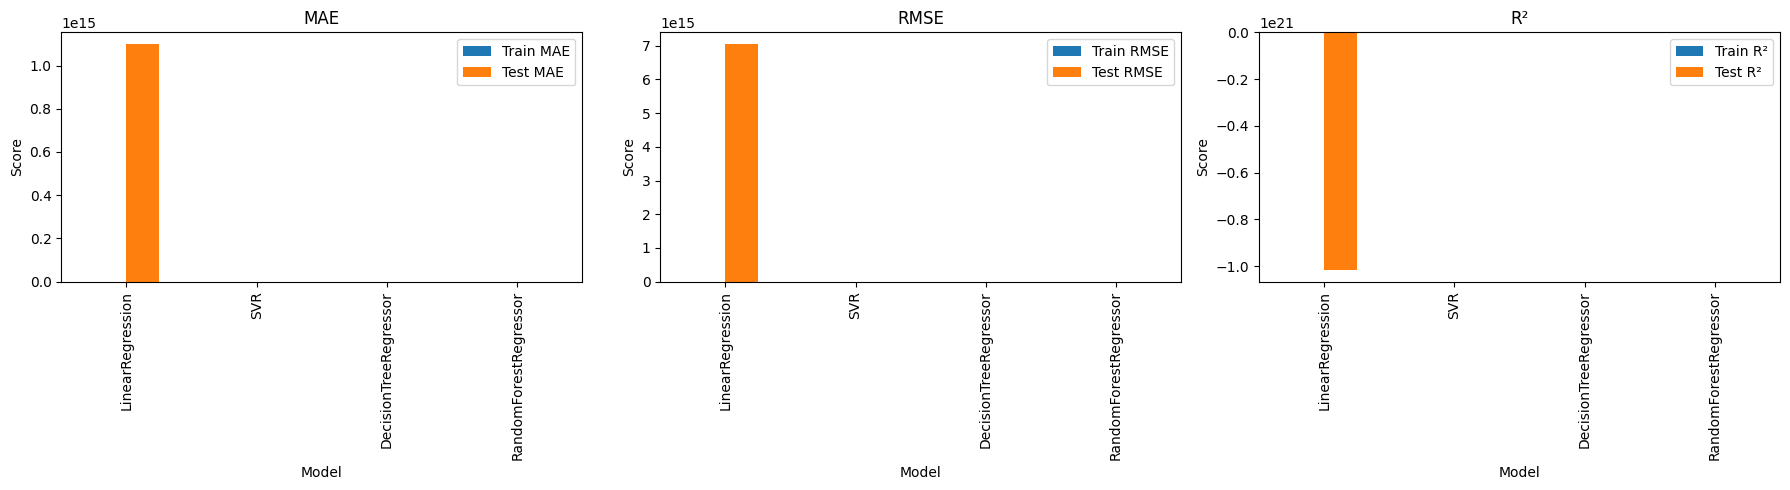

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return {
        'Model': model.__class__.__name__,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

models = [LinearRegression(), SVR(kernel="linear"), DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42)]

results = []
for model in models:
    result = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
results_df[['Train MAE', 'Test MAE']].plot(kind='bar', ax=axes[0], title='MAE')
results_df[['Train RMSE', 'Test RMSE']].plot(kind='bar', ax=axes[1], title='RMSE')
results_df[['Train R²', 'Test R²']].plot(kind='bar', ax=axes[2], title='R²')

for ax in axes:
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')

plt.tight_layout()
plt.show()
